| NAMES                                          | IDs      |
|------------------------------------------------|----------|
| Hebatuallah Ayman Mohamed Mokhtar Abdulaziz    | 1900022  |
| Andrew Adel Hosny Goued                        | 1900158  |



 


### Useful Imports

In [4]:
# %pip install pydotplus
# %pip install graphviz

In [5]:
from sklearn.model_selection import train_test_split 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, f1_score,\
                            precision_score, recall_score, confusion_matrix,\
                            accuracy_score,roc_auc_score

#### Some global variables that can be used to check specific outputs

In [6]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the graphs

## STEP 1: LOADING THE DATASET AND VISUALISING IT

In [7]:
# read dataset (data.csv) using pandas.read_pickle. Note: this command will return a numpy array 
names =[
    'location',
    'country',
    'gender',
    'age',
    'vis_wuhan', 'from_wuhan',
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
    'diff_sym_hos',
    'result'
]
data_set=  pd.read_csv("data.csv") # data inside data.pkl saved in numpy array 
# print the size of the dataset i.e the length of the numpy array
data_set_size = len(data_set)
print(data_set_size )


863


Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [8]:
data_set.head(6)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


## Visualize the data

Text(0, 0.5, 'I2')

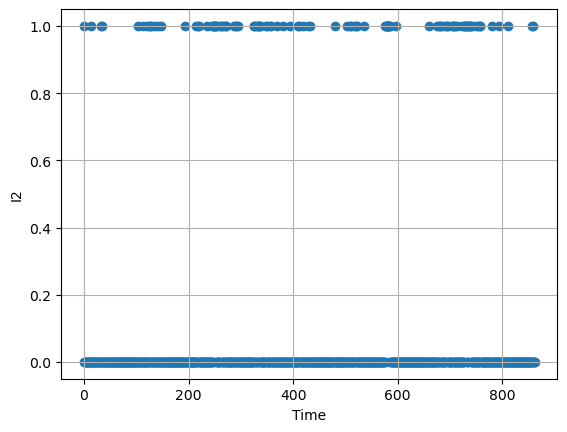

In [9]:
id= data_set['Unnamed: 0']
# print(t)
result = data_set['result']
# print(y)

plt.scatter(id,result)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("I2")

## Extract Y Training

In [10]:
Result_Training = data_set['result']
Features_Training = data_set[[
    'location',
    'country',
    'gender',
    'age',
    'vis_wuhan', 'from_wuhan',
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
    'diff_sym_hos']]
print(Features_Training)

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
0         104        8       1  66.0          1           0        14   
1         101        8       0  56.0          0           1        14   
2         137        8       1  46.0          0           1        14   
3         116        8       0  60.0          1           0        14   
4         116        8       1  58.0          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
858        48        3       2  24.0          0           0        14   
859         0        0       2  35.0          0           0        14   
860         3        1       1  49.4          0           0        14   
861        24        9       1  49.4          0           0        14   
862        15       27       1  70.0          0           0        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0          31        19        12         3         1

## Split data to test and training

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Features_Training, Result_Training,test_size=0.2, random_state = 1)
print(X_train)

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
207        51       18       1  55.0          0           1         6   
61        132        8       1  52.0          1           0        14   
853        10        4       1  49.4          0           0        14   
345        44       18       1  55.0          0           0        14   
838        61       19       2  49.4          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
715        45       13       1  51.0          0           0         6   
767       122       31       2  49.4          0           0        14   
72        135        8       0  39.0          1           0        14   
235       128       18       0  85.0          0           0        14   
37         13        8       0  33.0          0           1        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
207        31        19        12         3         1

## Fit the model for KNN

Feature Normalization

In [12]:
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

Hyperparameters Tuning 

In [13]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,16,2)}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='recall')


Training 

In [14]:
grid_search.fit(X_train_norm,y_train)
# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']
# Print the best parameter value
print(f'Best value for n_neighbors: {best_n_neighbors}')

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_train_norm, y_train)

Best value for n_neighbors: 1


KNeighborsClassifier(n_neighbors=1)

Testing

In [15]:
from sklearn.metrics import roc_curve, auc
ypred_KNN = best_knn_classifier.predict(X_test_norm)
# Assuming knn is a trained KNeighborsClassifier
y_pred_KNN_prob = best_knn_classifier.predict_proba(X_test_norm)[:, 1]

# scores
print(f"KNN_model_f1-score = {f1_score(y_test, ypred_KNN)}\n"
      f"KNN-precision = {precision_score(y_test, ypred_KNN)}\n"
      f"KNN_model-Recall = {recall_score(y_test, ypred_KNN)}")

roc_auc = roc_auc_score(y_test,y_pred_KNN_prob)
print("KNN_roc_auc_score:",roc_auc)

accuracy = accuracy_score(y_test, ypred_KNN)
print(f'KNN_Accuracy: {accuracy}')


KNN_model_f1-score = 0.6153846153846154
KNN-precision = 0.631578947368421
KNN_model-Recall = 0.6
KNN_roc_auc_score: 0.777124183006536
KNN_Accuracy: 0.9132947976878613


Confussion Matrix & ROC visualization

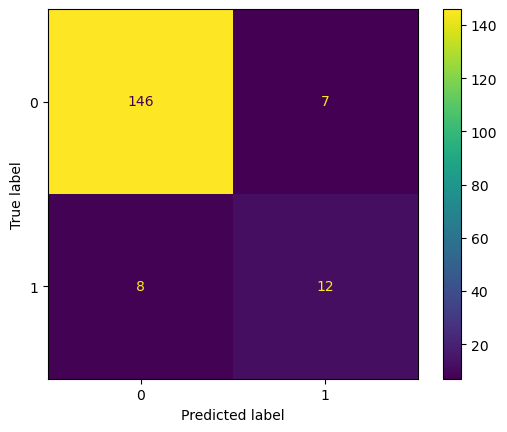

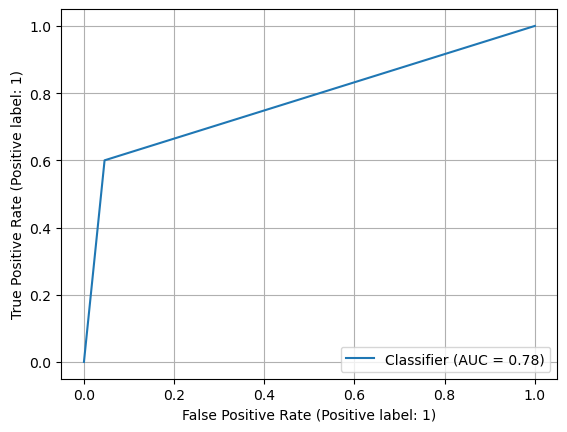

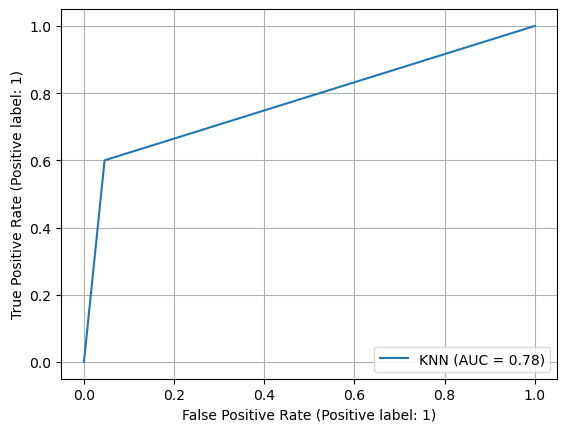

In [16]:
# Confusion Matrix 
cm = confusion_matrix(y_test, ypred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn_classifier.classes_)
disp.plot()
plt.show()
# Use the same predicted probabilities in both methods
RocCurveDisplay.from_predictions(y_test, y_pred_KNN_prob)
plt.grid()
plt.show()

RocCurveDisplay.from_estimator(best_knn_classifier, X_test_norm, y_test, name="KNN")
plt.grid()
plt.show()

## Fit the model for Logistic Regression

Hyperparameters Tuning 

In [17]:
log_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

Feature Normalization 

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training 

In [19]:
log_classifier = LogisticRegression()
log_clf_cv = GridSearchCV(log_classifier, log_param_grid, cv=10, scoring='recall')
best_log_clf = log_clf_cv.fit(X_train_scaled, y_train).best_estimator_
print(f"{best_log_clf.penalty = }\n{best_log_clf.C = }\n{best_log_clf.max_iter = }")

best_log_clf.penalty = 'l2'
best_log_clf.C = 10
best_log_clf.max_iter = 100


Testing 

In [20]:
ypred_logreg = best_log_clf.predict(X_test_scaled)
y_pred_prob_log = best_log_clf.predict_proba(X_test_scaled)[:, 1]

# Precision, Recall, f1-score
print(f"log_model_f1-score = {f1_score(y_test, ypred_logreg)}\n"
      f"log_model-precision = {precision_score(y_test,ypred_logreg)}\n"
      f"log_model-Recall = {recall_score(y_test,ypred_logreg)}")

roc_auc = roc_auc_score(y_test,y_pred_prob_log)
print("log_model_roc_auc_score:",roc_auc)
accuracy = accuracy_score(y_test, ypred_logreg)
print(f'log_model_Accuracy: {accuracy}')

log_model_f1-score = 0.5806451612903226
log_model-precision = 0.8181818181818182
log_model-Recall = 0.45
log_model_roc_auc_score: 0.968954248366013
log_model_Accuracy: 0.9248554913294798


[[151   2]
 [ 11   9]]


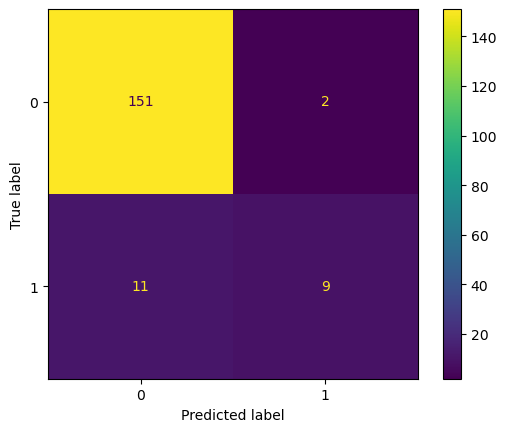

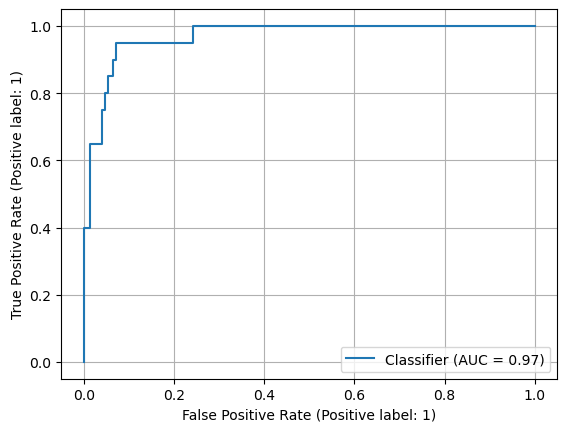

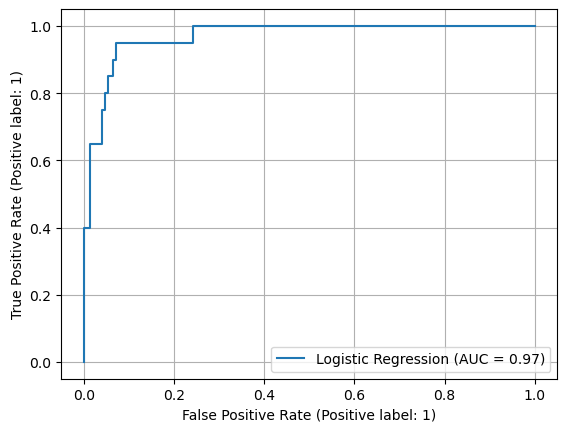

In [21]:
# Confusion Matrix 
cm = confusion_matrix(y_test, ypred_logreg)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_clf.classes_)
disp.plot()
plt.show()

# ROC curve 
RocCurveDisplay.from_predictions(y_test, y_pred_prob_log)
plt.grid()
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(best_log_clf, X_test_scaled, y_test, name='Logistic Regression')
plt.grid()

## Fit the model for Naive Bayes

Training with K-Folds 

In [22]:
# Number of splits for KFold cross-validation
n_splits = 10

# Scoring metric of interest
scoring_metric = recall_score

# Initialize variables to track the best classifier and its corresponding recall score
max_recall_score = 0
best_naive_classifier = GaussianNB()

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X_train):

    # Split the data into training and validation sets
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]

    current_naive_classifier = GaussianNB()
    current_naive_classifier.fit(X_fold_train, y_fold_train)
    y_val_predicted = current_naive_classifier.predict(X_fold_val)
    cv_score = scoring_metric(y_true=y_fold_val, y_pred=y_val_predicted)

    # Update the best classifier if the current score is higher
    if cv_score > max_recall_score:
        best_naive_classifier = current_naive_classifier
        max_recall_score = cv_score

# Print the best classifier and its corresponding recall score
print(f"{best_naive_classifier = }\n{max_recall_score = }")


best_naive_classifier = GaussianNB()
max_recall_score = 1.0


Testing

In [23]:
# Testing
y_pred_naive = best_naive_classifier.predict(X_test) ########
y_pred_prob_naive = best_naive_classifier.predict_proba(X_test)[:, 1]

# scores
print(f"naive_model_F1-score = {f1_score(y_test, y_pred_naive)}\n"
      f"naive_model-precision = {precision_score(y_test, y_pred_naive)}\n"
      f"naive_model-Recall = {recall_score(y_test, y_pred_naive)}")
roc_auc = roc_auc_score(y_test,y_pred_prob_naive)
print("naive_roc_auc_score:",roc_auc)
accuracy = accuracy_score(y_test, y_pred_naive)
print(f'naive_Accuracy: {accuracy}')



naive_model_F1-score = 0.43181818181818177
naive_model-precision = 0.27941176470588236
naive_model-Recall = 0.95
naive_roc_auc_score: 0.8718954248366013
naive_Accuracy: 0.7109826589595376


Confussion Matrix & ROC visualization

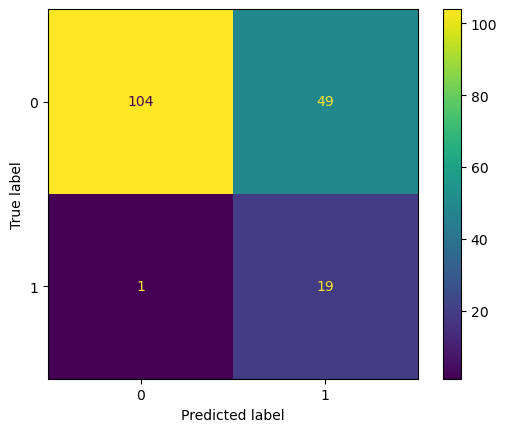

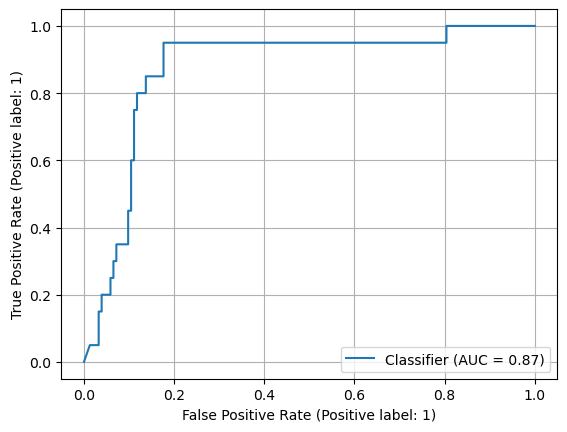

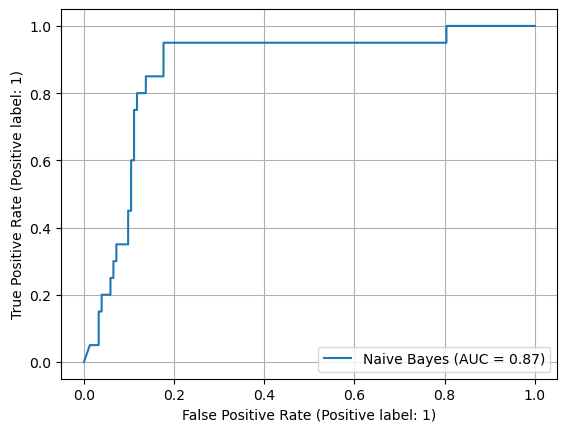

In [24]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_naive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_naive_classifier.classes_)
disp.plot()
plt.show()
# ROC curve 
RocCurveDisplay.from_predictions(y_test, y_pred_prob_naive)
plt.grid()
plt.show()
# ROC curve 
RocCurveDisplay.from_estimator(best_naive_classifier, X_test, y_test, name="Naive Bayes")
plt.grid()
plt.show()

## compare the performance

<Figure size 800x800 with 0 Axes>

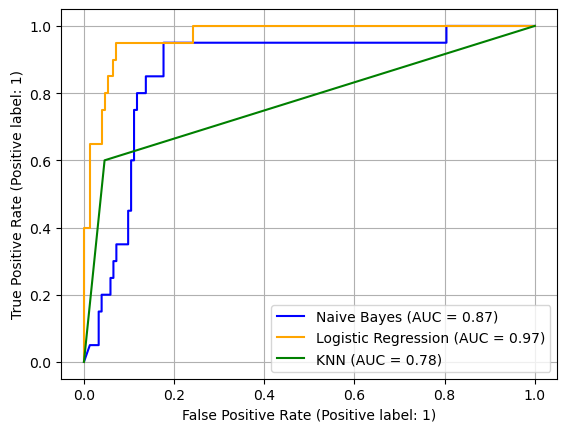

In [25]:
# Create and fit classifiers
naive_clf = best_naive_classifier
logreg_clf = best_log_clf  # Assuming best_log_clf is already defined
knn_clf = best_knn_classifier    # Assuming best_knn_clf is already defined
 # Assuming best_svm_clf is already defined

# Plot all ROC curves on the same graph with different colors
plt.figure(figsize=(8, 8))

# ROC curve for Naive Bayes (color='blue')
display = RocCurveDisplay.from_predictions( y_test,y_pred_prob_naive, color='blue', name="Naive Bayes")

# ROC curve for Logistic Regression (color='orange')
RocCurveDisplay.from_predictions( y_test, y_pred_prob_log, ax=display.ax_, color='orange', name="Logistic Regression")

# ROC curve for KNN (color='green')
RocCurveDisplay.from_predictions(y_test,y_pred_KNN_prob, ax=display.ax_, color='green', name="KNN")

plt.grid()
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt

def make_spider(row, title, color):
    # Get the list of variable categories
    categories = list(df)[1:]
    num_categories = len(categories)

    # Calculate the angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot

    # Initialize the spider plot
    ax = plt.subplot(3, 2, row+1, polar=True)

    # Set plot direction and offset
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2)

    # Draw axes and labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75, 1], ["0.25", "0.5", "0.75", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    # Plot data
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=title)
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add title
    plt.title(title, size=11, color=color, y=1.1)

# Example usage:
# make_spider(row=1, title="Example Title", color="blue")
# plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14592\411661684.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set3", len(df.index))


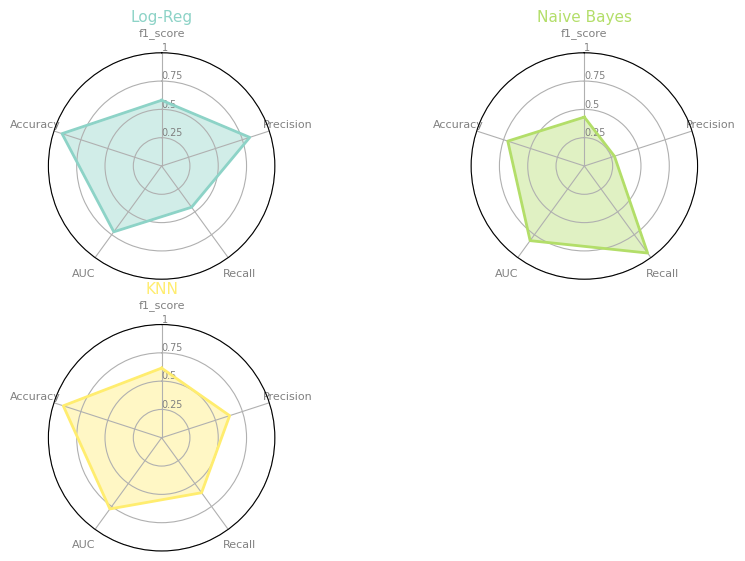

In [27]:
# Libraries
from math import pi
from sklearn.metrics import roc_auc_score
# Set data
df = pd.DataFrame( {
    'group': ['Log-Reg', 'Naive Bayes', 'KNN'],
    'f1_score': [f1_score(y_test, ypred_logreg),  f1_score(y_test, y_pred_naive),\
                 f1_score(y_test, ypred_KNN)],
    'Precision': [precision_score(y_test, ypred_logreg),  precision_score(y_test, y_pred_naive),\
                   precision_score(y_test, ypred_KNN)],
    'Recall': [recall_score(y_test, ypred_logreg),  recall_score(y_test, y_pred_naive),\
                recall_score(y_test, ypred_KNN)],
    'AUC': [roc_auc_score(y_test, ypred_logreg),  roc_auc_score(y_test, y_pred_naive), \
             roc_auc_score(y_test, ypred_KNN)],
    'Accuracy':  [accuracy_score(y_test, ypred_logreg ),  accuracy_score(y_test, y_pred_naive), \
                   accuracy_score(y_test, ypred_KNN)]
})

# PART 2: Apply the function to all individuals
# initialize the figure
my_dpi = 100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set3", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=df['group'][row], color=my_palette(row))

# Fit model for Decision Tree

Hyperparameter Tuning 


In [28]:
DT_param_grid = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': list(range(4,13,2))
    }
]

Training 

In [29]:
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Specify the scoring metric for grid search, in this case, Recall
scoring_metric = 'recall'

# Perform GridSearchCV to find the best Decision Tree classifier
best_decision_tree_clf_cv = GridSearchCV(decision_tree_classifier, param_grid=DT_param_grid, cv=10, scoring=scoring_metric)

#Training 
best_decision_tree_classifier = best_decision_tree_clf_cv.fit(X_train,y_train).best_estimator_

#print 
print(f"{best_decision_tree_classifier.max_depth = }\n{best_decision_tree_classifier.criterion = }")


best_decision_tree_classifier.max_depth = 10
best_decision_tree_classifier.criterion = 'entropy'


In [30]:
#Decision Tree
# dot_data = StringIO()
# export_graphviz(best_decision_tree_classifier, out_file=dot_data, rounded=True,
#                 filled=True, special_characters=True, class_names=["0", "1"])

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png("COVID-19.png")
# Image(graph.create_png())

Testing

In [31]:
# making predictions
y_pred_Decision_Tree = best_decision_tree_classifier.predict(X_test)
y_pred_prob_Decision_Tree  = best_decision_tree_classifier.predict_proba(X_test)[:, 1]

# Precision, Recall, f1-score
print(f"DecisionTree_model_f1-score = {f1_score(y_test, y_pred_Decision_Tree)}\n"
      f"DecisionTree-precision = {precision_score(y_test,y_pred_Decision_Tree)}\n"
      f"DecisionTree-Recall = {recall_score(y_test,y_pred_Decision_Tree)}")

roc_auc = roc_auc_score(y_test,y_pred_prob_Decision_Tree)
print("DecisionTree_roc_auc_score:",roc_auc)
accuracy = accuracy_score(y_test, y_pred_Decision_Tree)
print(f'DecisionTree_model_Accuracy: {accuracy}')

DecisionTree_model_f1-score = 0.8333333333333334
DecisionTree-precision = 0.9375
DecisionTree-Recall = 0.75
DecisionTree_roc_auc_score: 0.8717320261437909
DecisionTree_model_Accuracy: 0.9653179190751445


Confussion Matrix & ROC visualization

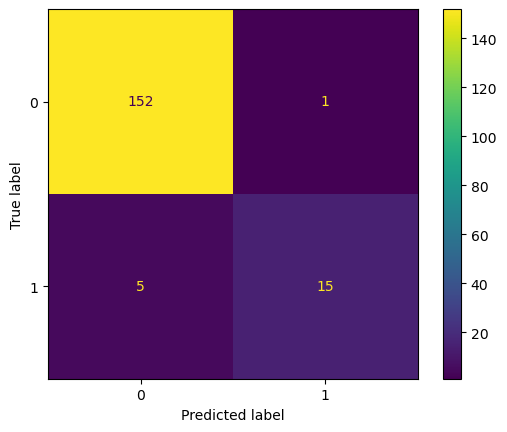

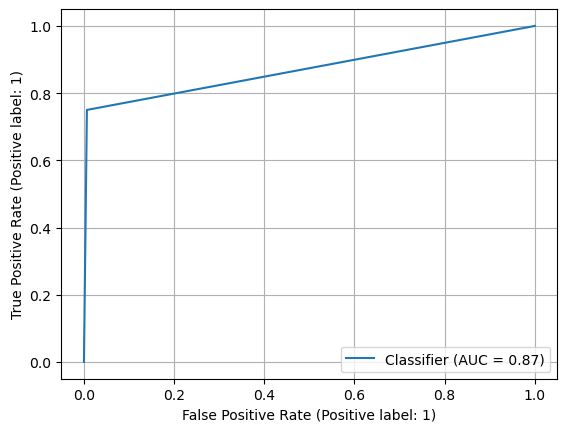

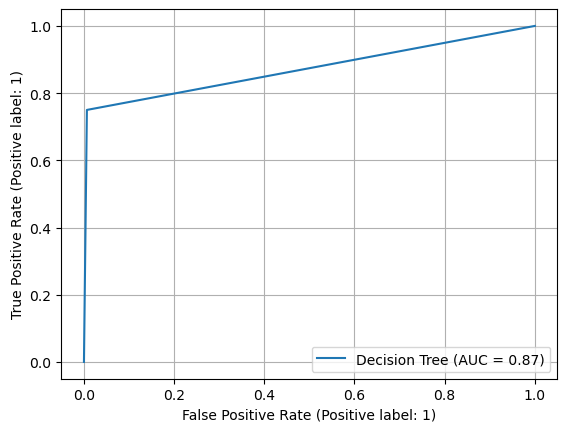

In [32]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_Decision_Tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_naive_classifier.classes_)
disp.plot()
plt.show()
# ROC curve 
RocCurveDisplay.from_predictions(y_test, y_pred_prob_Decision_Tree)
plt.grid()
plt.show()
# ROC curve 
RocCurveDisplay.from_estimator(best_decision_tree_classifier, X_test, y_test, name="Decision Tree")
plt.grid()
plt.show()

# Fit for SVM 

#### Hyperparameter Tunning

Scaling the feature

In [33]:
print(np.logspace(-5, 5, 4))

[1.00000000e-05 2.15443469e-02 4.64158883e+01 1.00000000e+05]


In [41]:
# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('svm', SVC(probability=True))  # Step 2: Support Vector Machine classifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameter grid for SVM
param_grid = {
    'svm__C': [0.1, 1, 10, 100],      # Regularization parameter
    'svm__kernel': ['linear', 'rbf'], # Kernel type
    'svm__gamma': ['scale', 'auto'],    # Kernel coefficient (for 'rbf' kernel)
}

Training

In [42]:
# Create the GridSearchCV object
best_svm_clf = GridSearchCV(pipeline, param_grid, cv=10, scoring='recall')

# Fit the GridSearchCV object on the training data
best_svm_clf.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", best_svm_clf.best_params_)

# Get the best SVM model
best_svm_model = best_svm_clf.best_estimator_

# Evaluate the best model on the test set
accuracy = best_svm_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Test Accuracy: 0.9710982658959537


Testing

In [40]:
# making predictions
y_pred_svm = best_svm_clf.predict(X_test)
y_pred_svm_prob = best_svm_clf.predict_proba(X_test)[:, 1]
# Confusion Matrix

# Precision, Recall, f1-score
print(f"svm_model_f1-score = {f1_score(y_test, y_pred_svm)}\n"
      "svm_model-precision = {precision_score(y_test,y_pred_svm)}\n"
      "svm_model-Recall = {recall_score(y_test,y_pred_svm)}")

roc_auc = roc_auc_score(y_test,y_pred_svm_prob)
print("log_model_roc_auc_score:",roc_auc)

svm_model_f1-score = 0.8648648648648648
svm_model-precision = {precision_score(y_test,y_pred_svm)}
svm_model-Recall = {recall_score(y_test,y_pred_svm)}
log_model_roc_auc_score: 0.9718954248366014


Confussion Matrix & ROC visualization

[[152   1]
 [  4  16]]


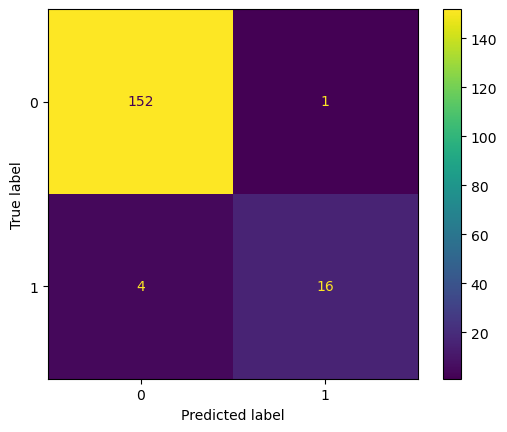

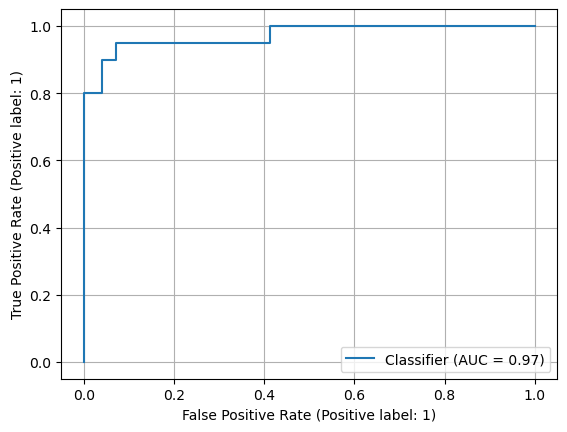

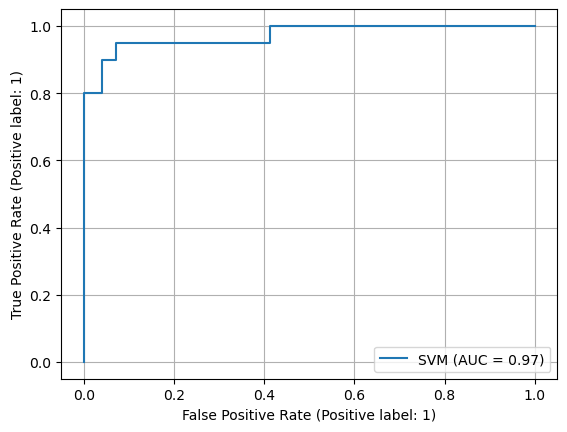

In [36]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_clf.classes_)
disp.plot()
plt.show()

# ROC curve 
RocCurveDisplay.from_predictions(y_test, y_pred_svm_prob)
plt.grid()
plt.show()

# ROC curve
RocCurveDisplay.from_estimator(best_svm_clf, X_test, y_test, name='SVM')
plt.grid()